<a href="https://colab.research.google.com/github/shashwat9kumar/Heart_Disease_Prediction/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/pydeveloperashish/Heart-Disease-Prediction/master/heart.csv")
df.head()


## https://www.kaggle.com/ronitf/heart-disease-uci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

In [5]:
info_df = {}
for i, column in enumerate(df.columns):
    if column == 'target':
        info_df[column] = 'Result: 0 if no heart disease, 1 if there is'
    else:
        info_df[column] = info[i]

In [6]:
info_df

{'age': 'age',
 'ca': 'number of major vessels (0-3) colored by flourosopy',
 'chol': ' serum cholestoral in mg/dl',
 'cp': 'chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic',
 'exang': 'exercise induced angina',
 'fbs': 'fasting blood sugar > 120 mg/dl',
 'oldpeak': 'oldpeak = ST depression induced by exercise relative to rest',
 'restecg': 'resting electrocardiographic results (values 0,1,2)',
 'sex': '1: male, 0: female',
 'slope': 'the slope of the peak exercise ST segment',
 'target': 'Result: 0 if no heart disease, 1 if there is',
 'thal': 'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect',
 'thalach': ' maximum heart rate achieved',
 'trestbps': 'resting blood pressure'}

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Visualizations

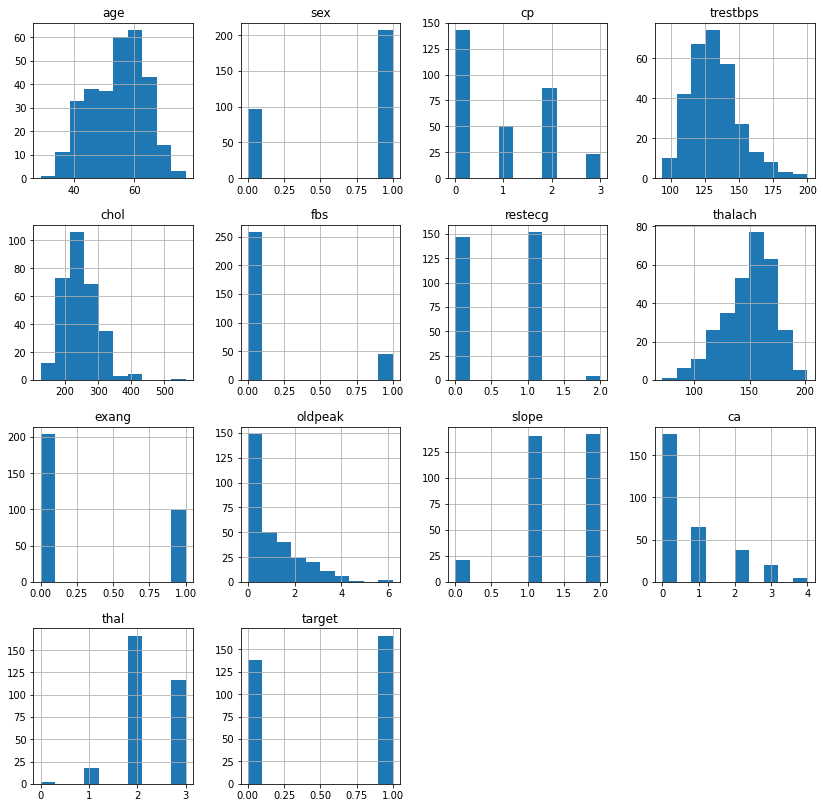

In [13]:
  df.hist(figsize=(14,14));

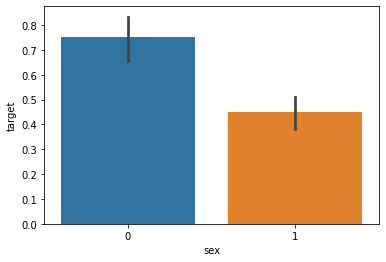

In [14]:
sns.barplot(x=df['sex'], y=df['target'])  # sex on X axis and target on Y axis

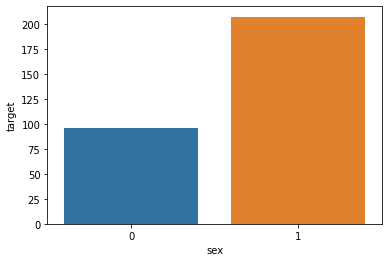

In [15]:
sns.barplot(x=df['sex'], y=df['target'], estimator=len)  # sex on X axis and target on Y axis

In [16]:
df.groupby('sex').target.value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



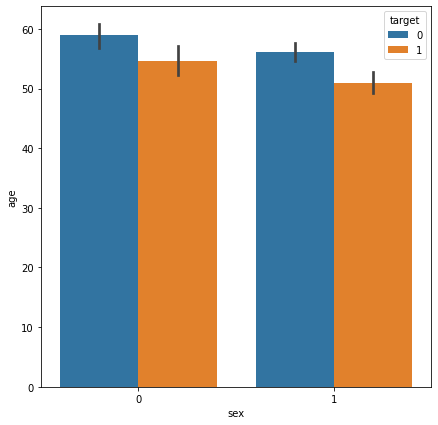

In [17]:
plt.figure(figsize=(7,7))
sns.barplot(df['sex'], df['age'], hue=df['target'])
# sns.barplot(x='sex', y='age', data=df, hue=df['target']) #or this
plt.show()

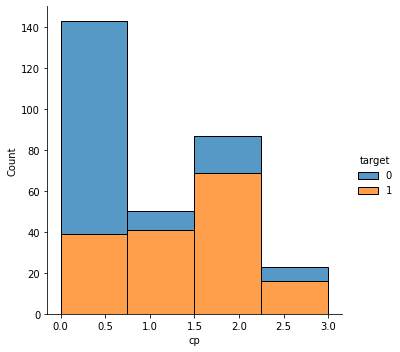

In [18]:
sns.displot(data=df, x='cp', hue='target', multiple='stack', bins=4)

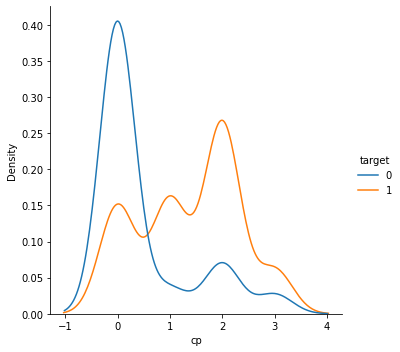

In [19]:
sns.displot(data=df, x='cp', hue='target', kind='kde')

In [20]:
df.groupby('cp').target.value_counts().unstack()

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


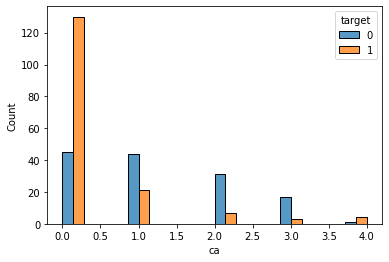

In [21]:
sns.histplot(df, x='ca', hue='target', multiple='dodge')

In [22]:
df.groupby('ca').target.value_counts().unstack()

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


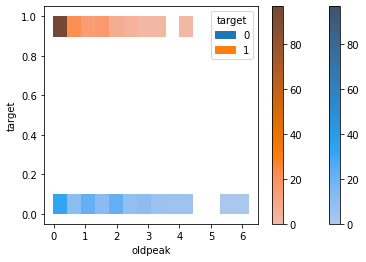

In [23]:
sns.histplot(df, x="oldpeak", y="target", hue="target", cbar=True)

In [24]:
df.groupby('target').oldpeak.value_counts().unstack().fillna(0)

oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,25.0,3.0,3.0,1.0,1.0,1.0,4.0,0.0,6.0,2.0,10.0,0.0,10.0,0.0,7.0,1.0,4.0,7.0,3.0,7.0,1.0,4.0,0.0,2.0,2.0,5.0,6.0,1.0,4.0,1.0,2.0,3.0,0.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0
1,74.0,4.0,9.0,2.0,8.0,4.0,10.0,1.0,7.0,1.0,4.0,2.0,7.0,1.0,6.0,4.0,7.0,3.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


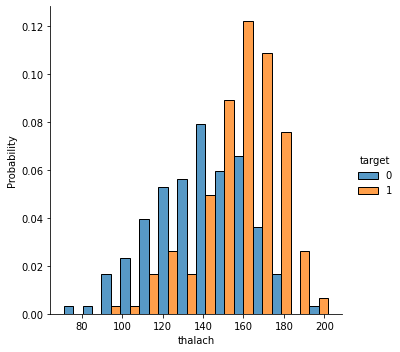

In [25]:
sns.displot(df, x="thalach", hue="target", multiple='dodge', stat='probability')

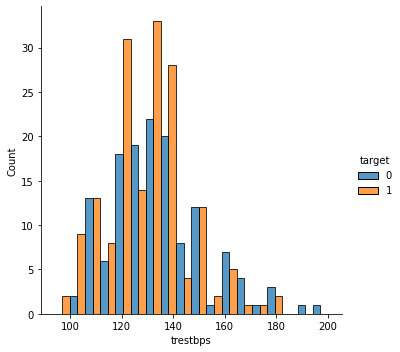

In [26]:
sns.displot(df, x="trestbps", hue="target", multiple='dodge')

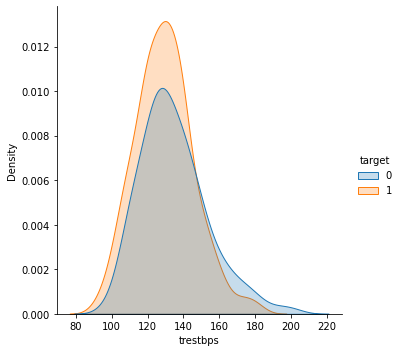

In [27]:
sns.displot(df, x="trestbps", hue="target", kind='kde', fill=True)

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
numeric_columns=['age', 'trestbps', 'chol', 'oldpeak', 'thalach']

In [30]:
## Get a datafreame where 'thal' isin [0, 1] ==> df[df.thal.isin([0, 1])]
## Show the desired columns using list arguments to the above dataframe

df[df.thal.isin([0, 1])][['age', 'sex', 'chol', 'cp', 'fbs']]

,age,sex,chol,cp,fbs
0,63,1,233,3,1
5,57,1,192,0,0
48,53,0,216,2,0
62,52,1,186,3,0
63,41,1,203,1,0
138,57,1,201,0,0
150,66,1,228,0,0
170,56,1,256,2,1
179,57,1,276,0,0
199,65,1,248,0,0


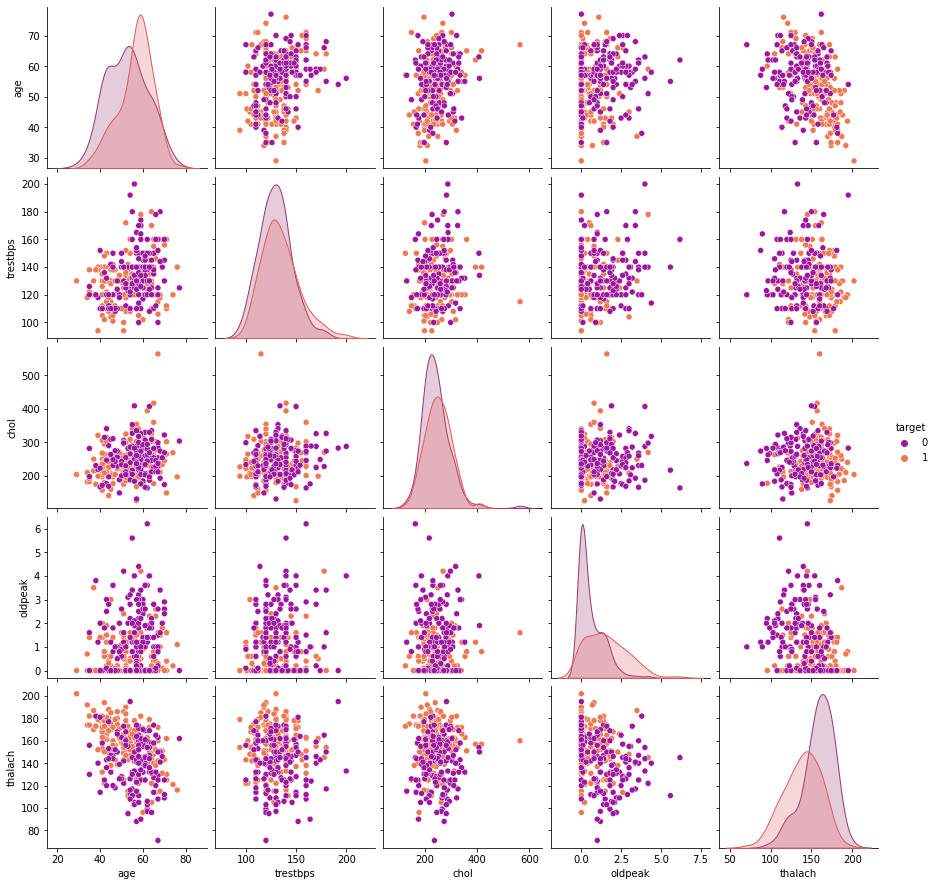

In [31]:
sns.pairplot(df,
             hue='target',
             vars=numeric_columns,
             palette='flare',
             plot_kws={'palette':'plasma'})

In [32]:
# from ipywidgets import interactive

# def size_of_the_widget(height=2.5, aspect=1):
#     sns.pairplot(df,
#              hue='target',
#              vars=numeric_columns,
#              palette='flare',
#              plot_kws={'palette':'plasma'},
#              height=height,
#              aspect=aspect)

In [33]:
# interactive(size_of_the_widget, height=(1, 4, 0.5), aspect=(0.4, 2, 0.2))

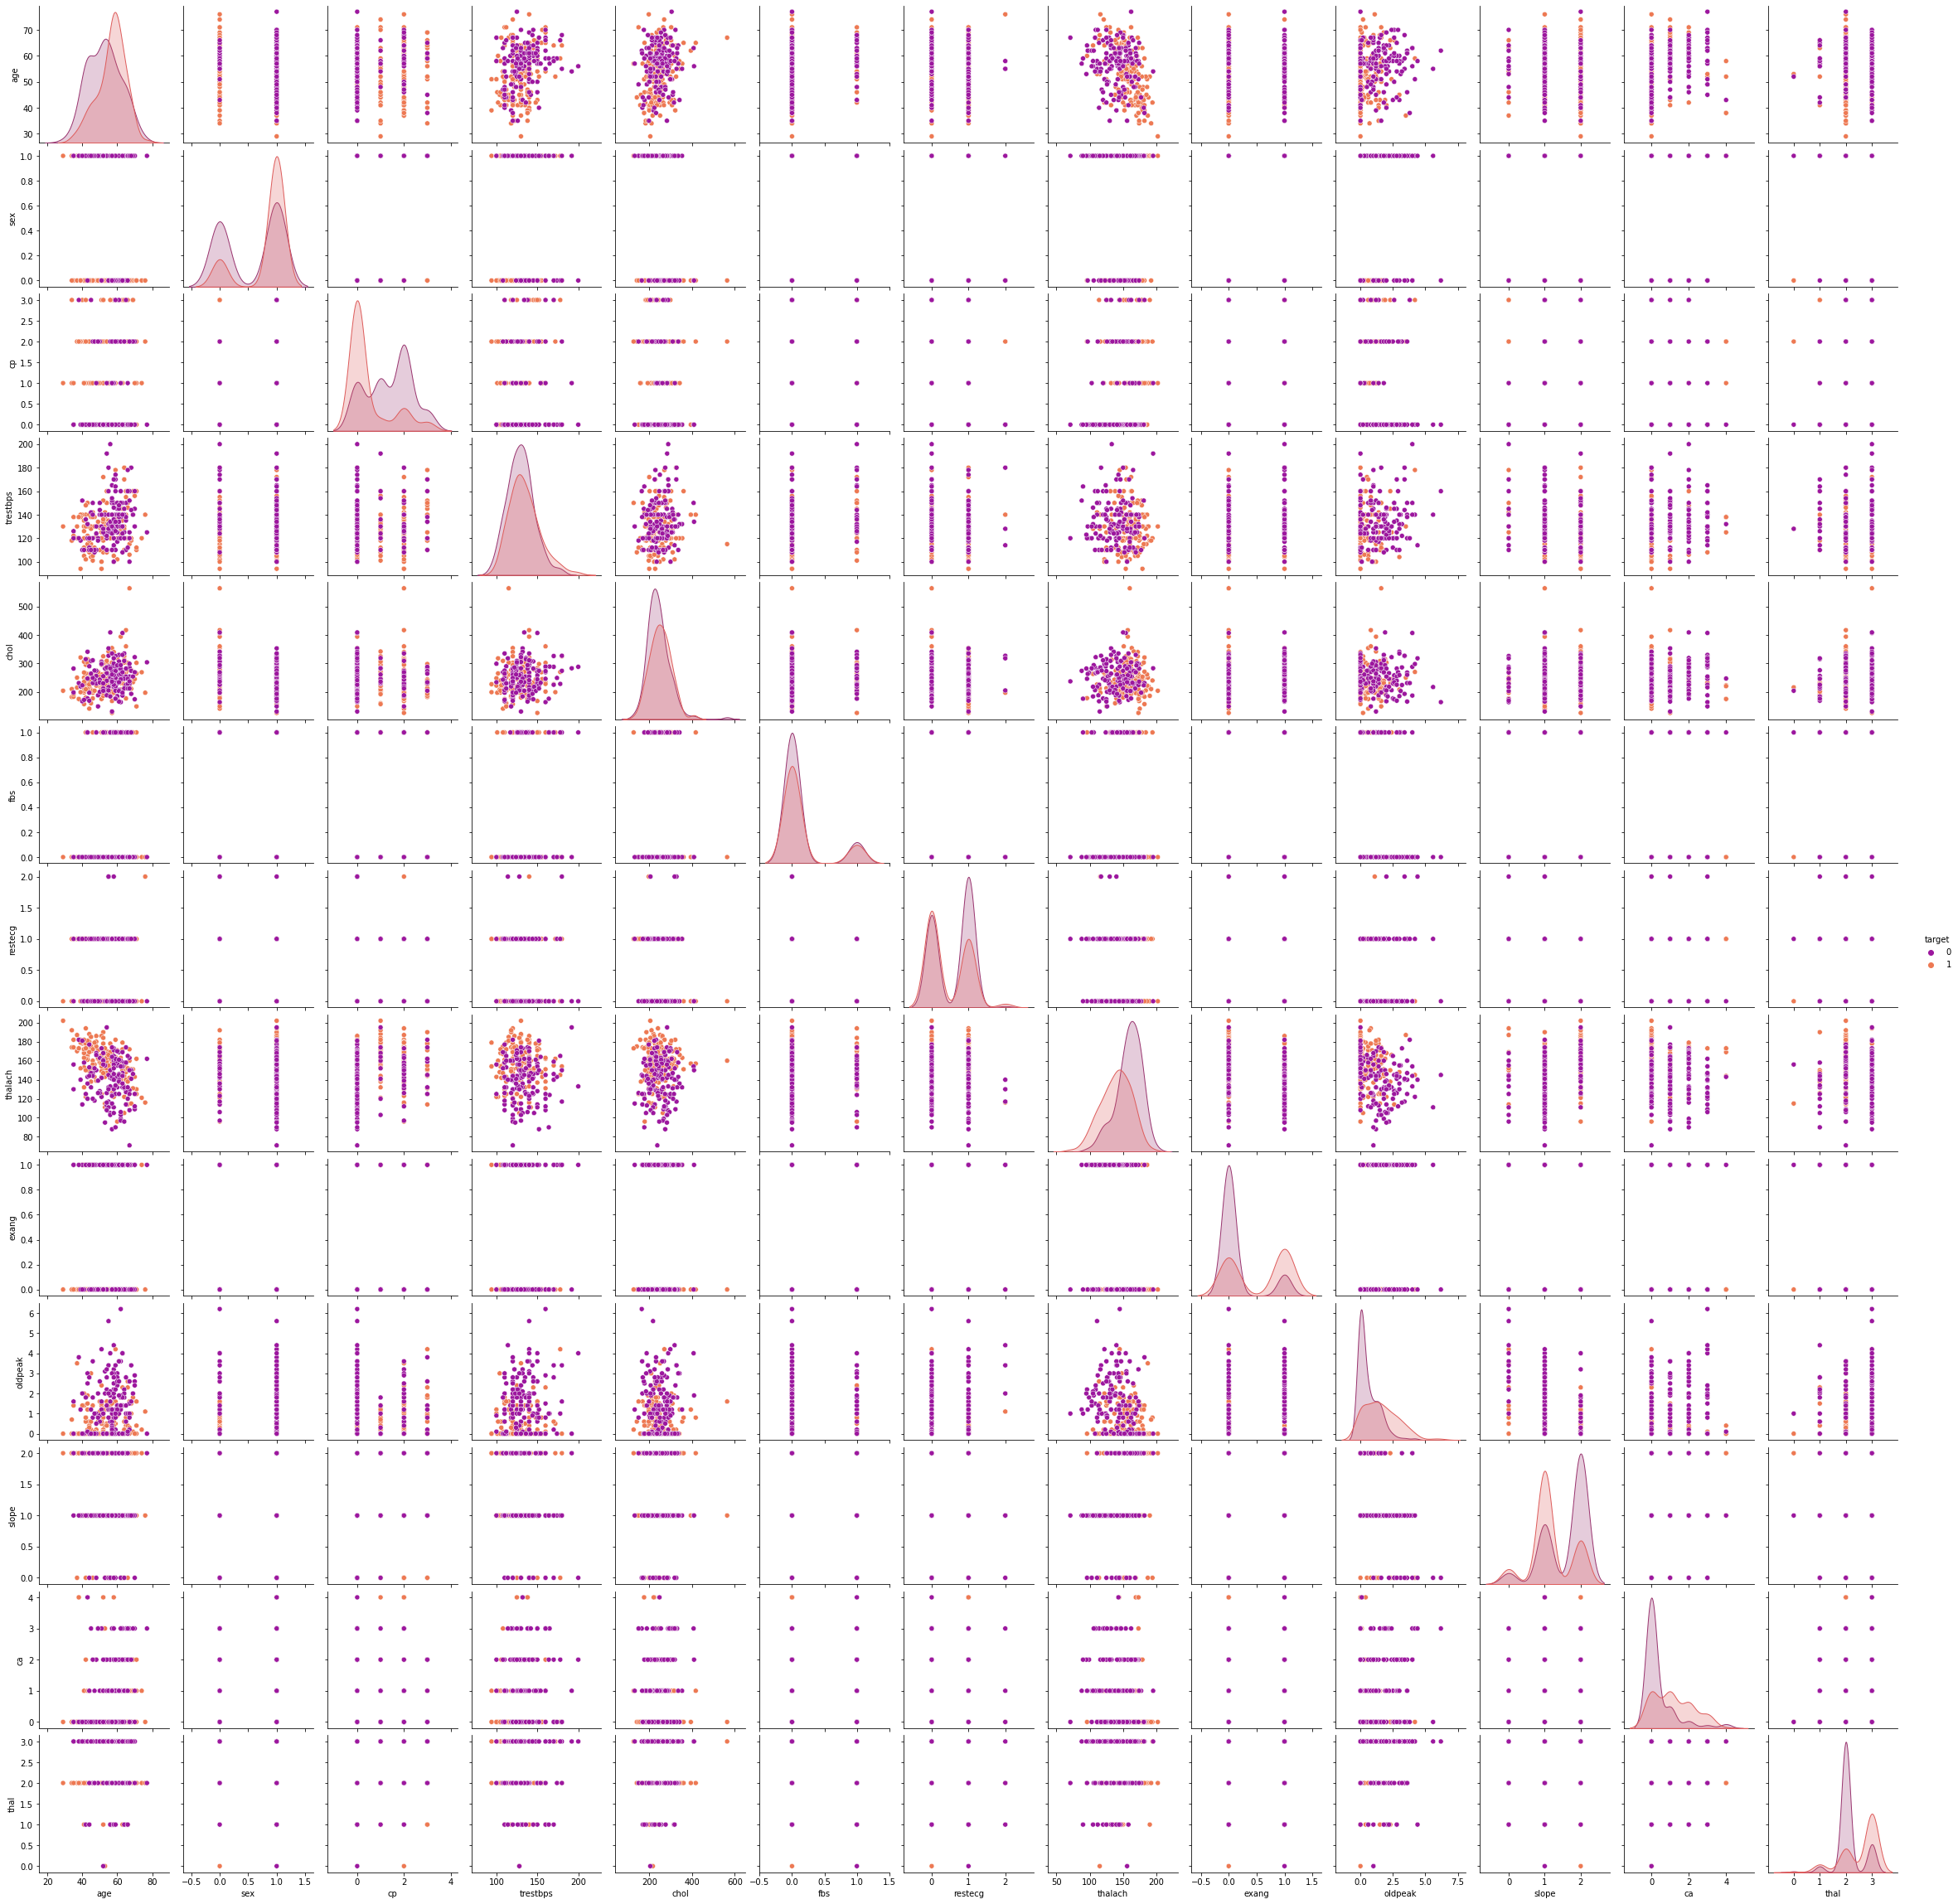

In [34]:
sns.pairplot(df,
             hue='target',
            #  vars=numeric_columns,
             palette='flare',
             plot_kws={'palette':'plasma'})

In [35]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


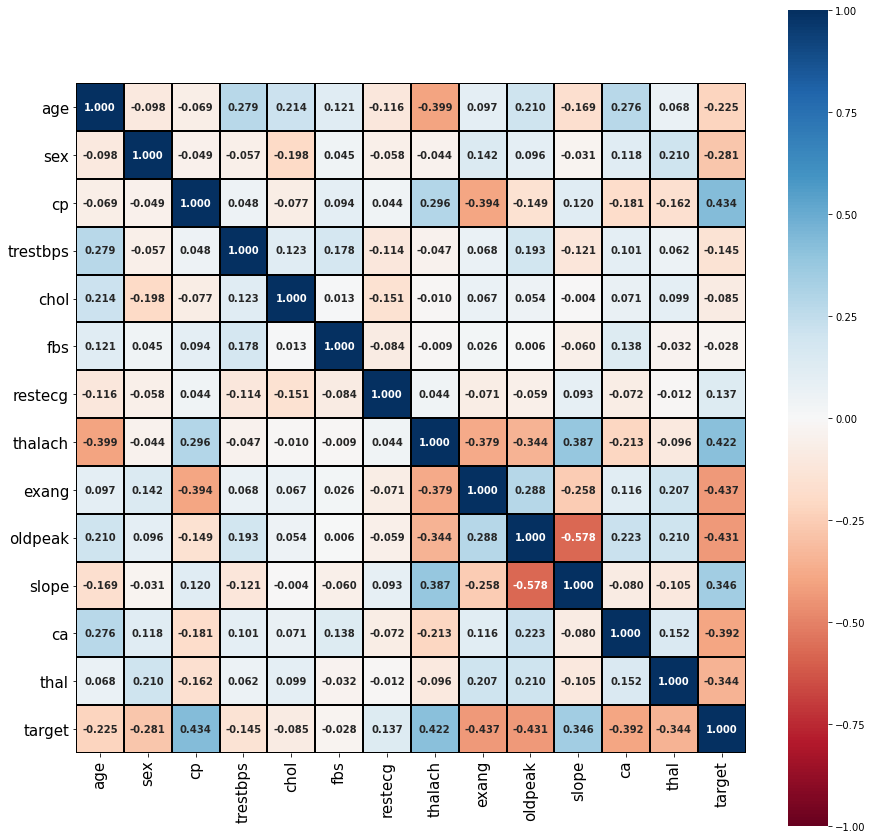

In [36]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=20, fontsize=15)
plt.yticks(rotation=20, fontsize=15)
sns.heatmap(df.corr(), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, 
            vmax=1, # Center makes the color palette bar center at 0 and vmin, vmax is used to define end boundaries of the color bar
            annot=True,
            fmt="0.3f",
            annot_kws = {
                "fontsize": 10,
                "fontweight": 'bold'
            },
            linewidth=1,
            linecolor='black',
            square=True)  ## Square = True will ensure that all blocks are squares
plt.show()

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
categorical_columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

len(categorical_columns) + len(numerical_columns)

13

In [43]:
y = df.target
X = df.drop('target', axis=1)

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [51]:
dataset = pd.get_dummies(X, columns=categorical_columns)

In [52]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [56]:
from sklearn.preprocessing import StandardScaler

In [60]:
std_scaler = StandardScaler()
dataset[numerical_columns] = std_scaler.fit_transform(dataset[numerical_columns])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [65]:
X = dataset

In [66]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 30), (91, 30), (212,), (91,))

In [72]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [79]:
clf_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [80]:
predictions_dtc = clf_dtc.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
accuracy_score(y_test, predictions_dtc)

0.7802197802197802

In [83]:
confusion_matrix(y_test, predictions_dtc)

array([[34,  7],
       [13, 37]])

In [84]:
import seaborn as sns

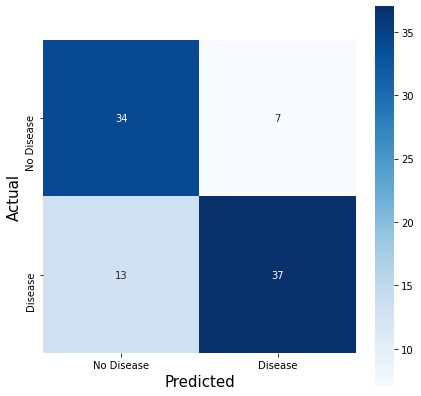

In [93]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, predictions_dtc),
            annot=True,
            cmap="Blues",
            square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.show()

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [97]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [102]:
predictions_knn = clf_knn.predict(X_test)
accuracy_score(y_test, predictions_knn)

0.8571428571428571

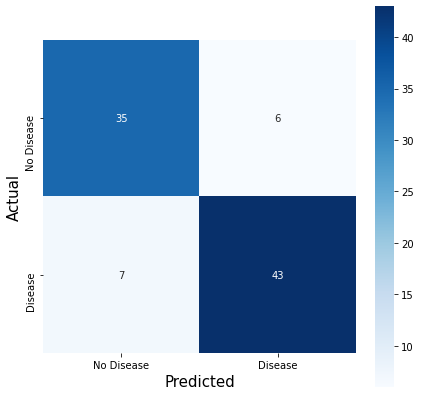

In [103]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, predictions_knn),
            annot=True,
            cmap="Blues",
            square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.show()

In [104]:
from sklearn.model_selection import cross_val_score

In [111]:
cross_validation_accuracy_knn = []
for i in range(1, 26):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf_knn, X, y, cv=5)
    print(f"Average Accuracy Score when neighbours are {i} is: \t", scores.mean())
    cross_validation_accuracy_knn.append(scores.mean())

Average Accuracy Score when neighbours are 1 is: 	 0.7622950819672131
Average Accuracy Score when neighbours are 2 is: 	 0.7655191256830601
Average Accuracy Score when neighbours are 3 is: 	 0.8184699453551912
Average Accuracy Score when neighbours are 4 is: 	 0.8020218579234972
Average Accuracy Score when neighbours are 5 is: 	 0.831584699453552
Average Accuracy Score when neighbours are 6 is: 	 0.8481420765027323
Average Accuracy Score when neighbours are 7 is: 	 0.8284153005464481
Average Accuracy Score when neighbours are 8 is: 	 0.8316393442622951
Average Accuracy Score when neighbours are 9 is: 	 0.825136612021858
Average Accuracy Score when neighbours are 10 is: 	 0.8316393442622951
Average Accuracy Score when neighbours are 11 is: 	 0.8249726775956285
Average Accuracy Score when neighbours are 12 is: 	 0.8316939890710383
Average Accuracy Score when neighbours are 13 is: 	 0.8249726775956285
Average Accuracy Score when neighbours are 14 is: 	 0.8282513661202187
Average Accuracy 

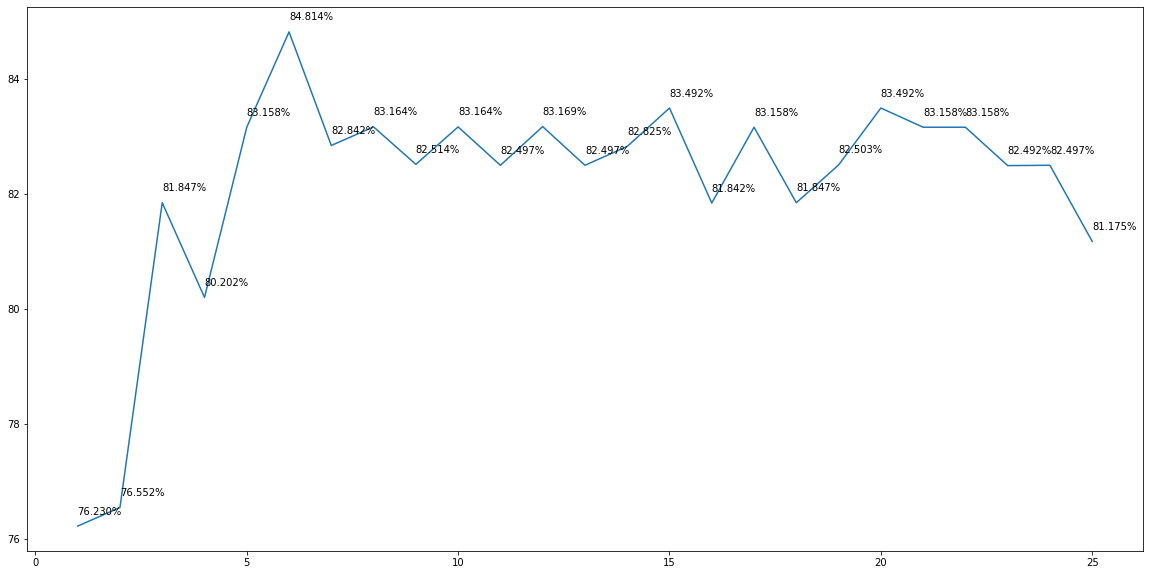

In [128]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1, 26)], [i*100.0 for i in cross_validation_accuracy_knn])
for i in range(1, 26):
    plt.text(i, cross_validation_accuracy_knn[i-1]*100 + 0.2, s=f'{cross_validation_accuracy_knn[i-1]*100:.3f}%')

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42)
clf_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [132]:
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [134]:
predictions_rfc = clf_rfc.predict(X_test)
accuracy_score(y_test, predictions_rfc)

0.7582417582417582

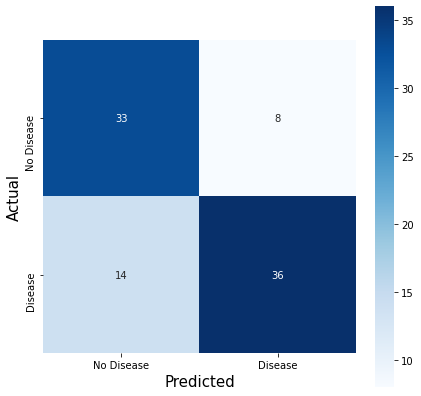

In [135]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, predictions_rfc),
            annot=True,
            cmap="Blues",
            square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.show()

In [138]:
cross_validation_accuracy_rfc = {}
for i in range(10, 201, 5):
    clf_rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    scores = cross_val_score(clf_rfc, X, y, cv=5)
    print(f"Average Accuracy Score when estimators are {i} is: \t", scores.mean())
    cross_validation_accuracy_rfc[i] = scores.mean()

Average Accuracy Score when estimators are 10 is: 	 0.8015846994535518
Average Accuracy Score when estimators are 15 is: 	 0.8281420765027322
Average Accuracy Score when estimators are 20 is: 	 0.8380874316939891
Average Accuracy Score when estimators are 25 is: 	 0.8512021857923496
Average Accuracy Score when estimators are 30 is: 	 0.8413661202185791
Average Accuracy Score when estimators are 35 is: 	 0.8346994535519124
Average Accuracy Score when estimators are 40 is: 	 0.8412021857923497
Average Accuracy Score when estimators are 45 is: 	 0.8346448087431695
Average Accuracy Score when estimators are 50 is: 	 0.8379781420765028
Average Accuracy Score when estimators are 55 is: 	 0.8412568306010929
Average Accuracy Score when estimators are 60 is: 	 0.838032786885246
Average Accuracy Score when estimators are 65 is: 	 0.8347540983606558
Average Accuracy Score when estimators are 70 is: 	 0.8348633879781421
Average Accuracy Score when estimators are 75 is: 	 0.834808743169399
Average 

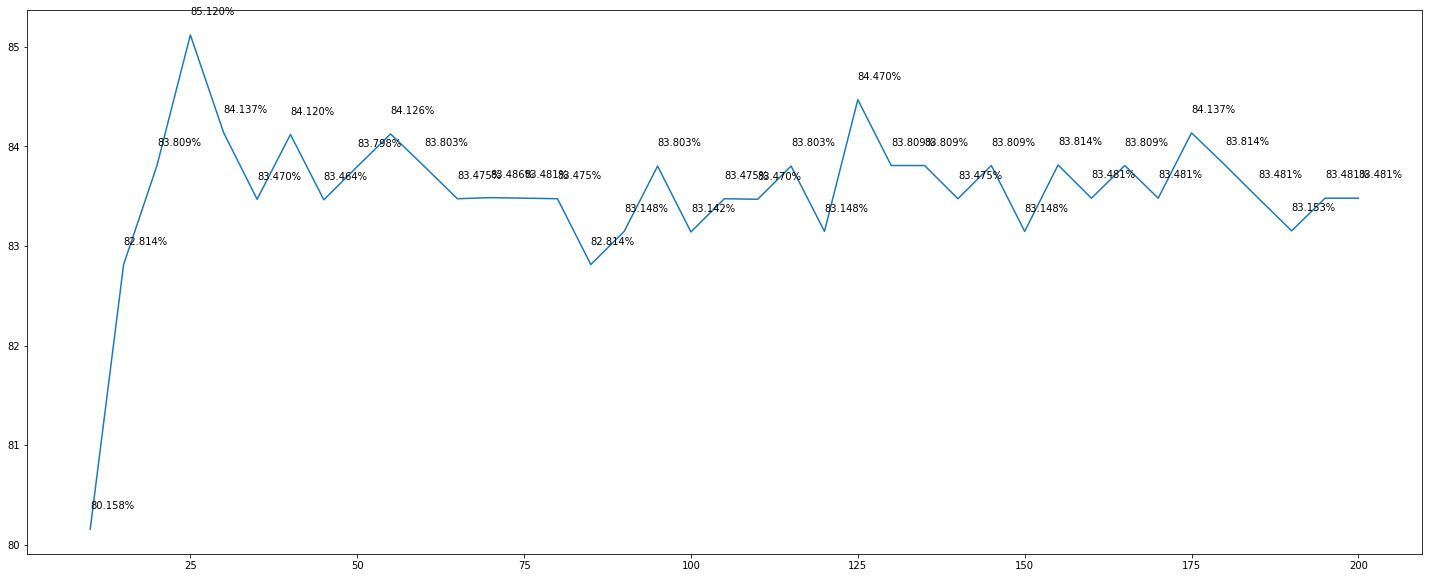

In [146]:
plt.figure(figsize=(25,10))
plt.plot([i for i in range(10, 201, 5)], [i*100.0 for i in cross_validation_accuracy_rfc.values()])
for k,v in cross_validation_accuracy_rfc.items():
    plt.text(k, cross_validation_accuracy_rfc[k]*100 + 0.2, s=f'{cross_validation_accuracy_rfc[k]*100:.3f}%')